age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholesterol in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise-induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by fluoroscopy
thal - 3 = normal; 6 = fixed defect; 7 = reversible defect
target - have disease or not (1 = yes, 0 = no)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

# import dataset
heart_df = pd.read_csv('heart.csv')
heart_df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [2]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_df.shape

(1025, 14)

In [5]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_df.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [7]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

EDA

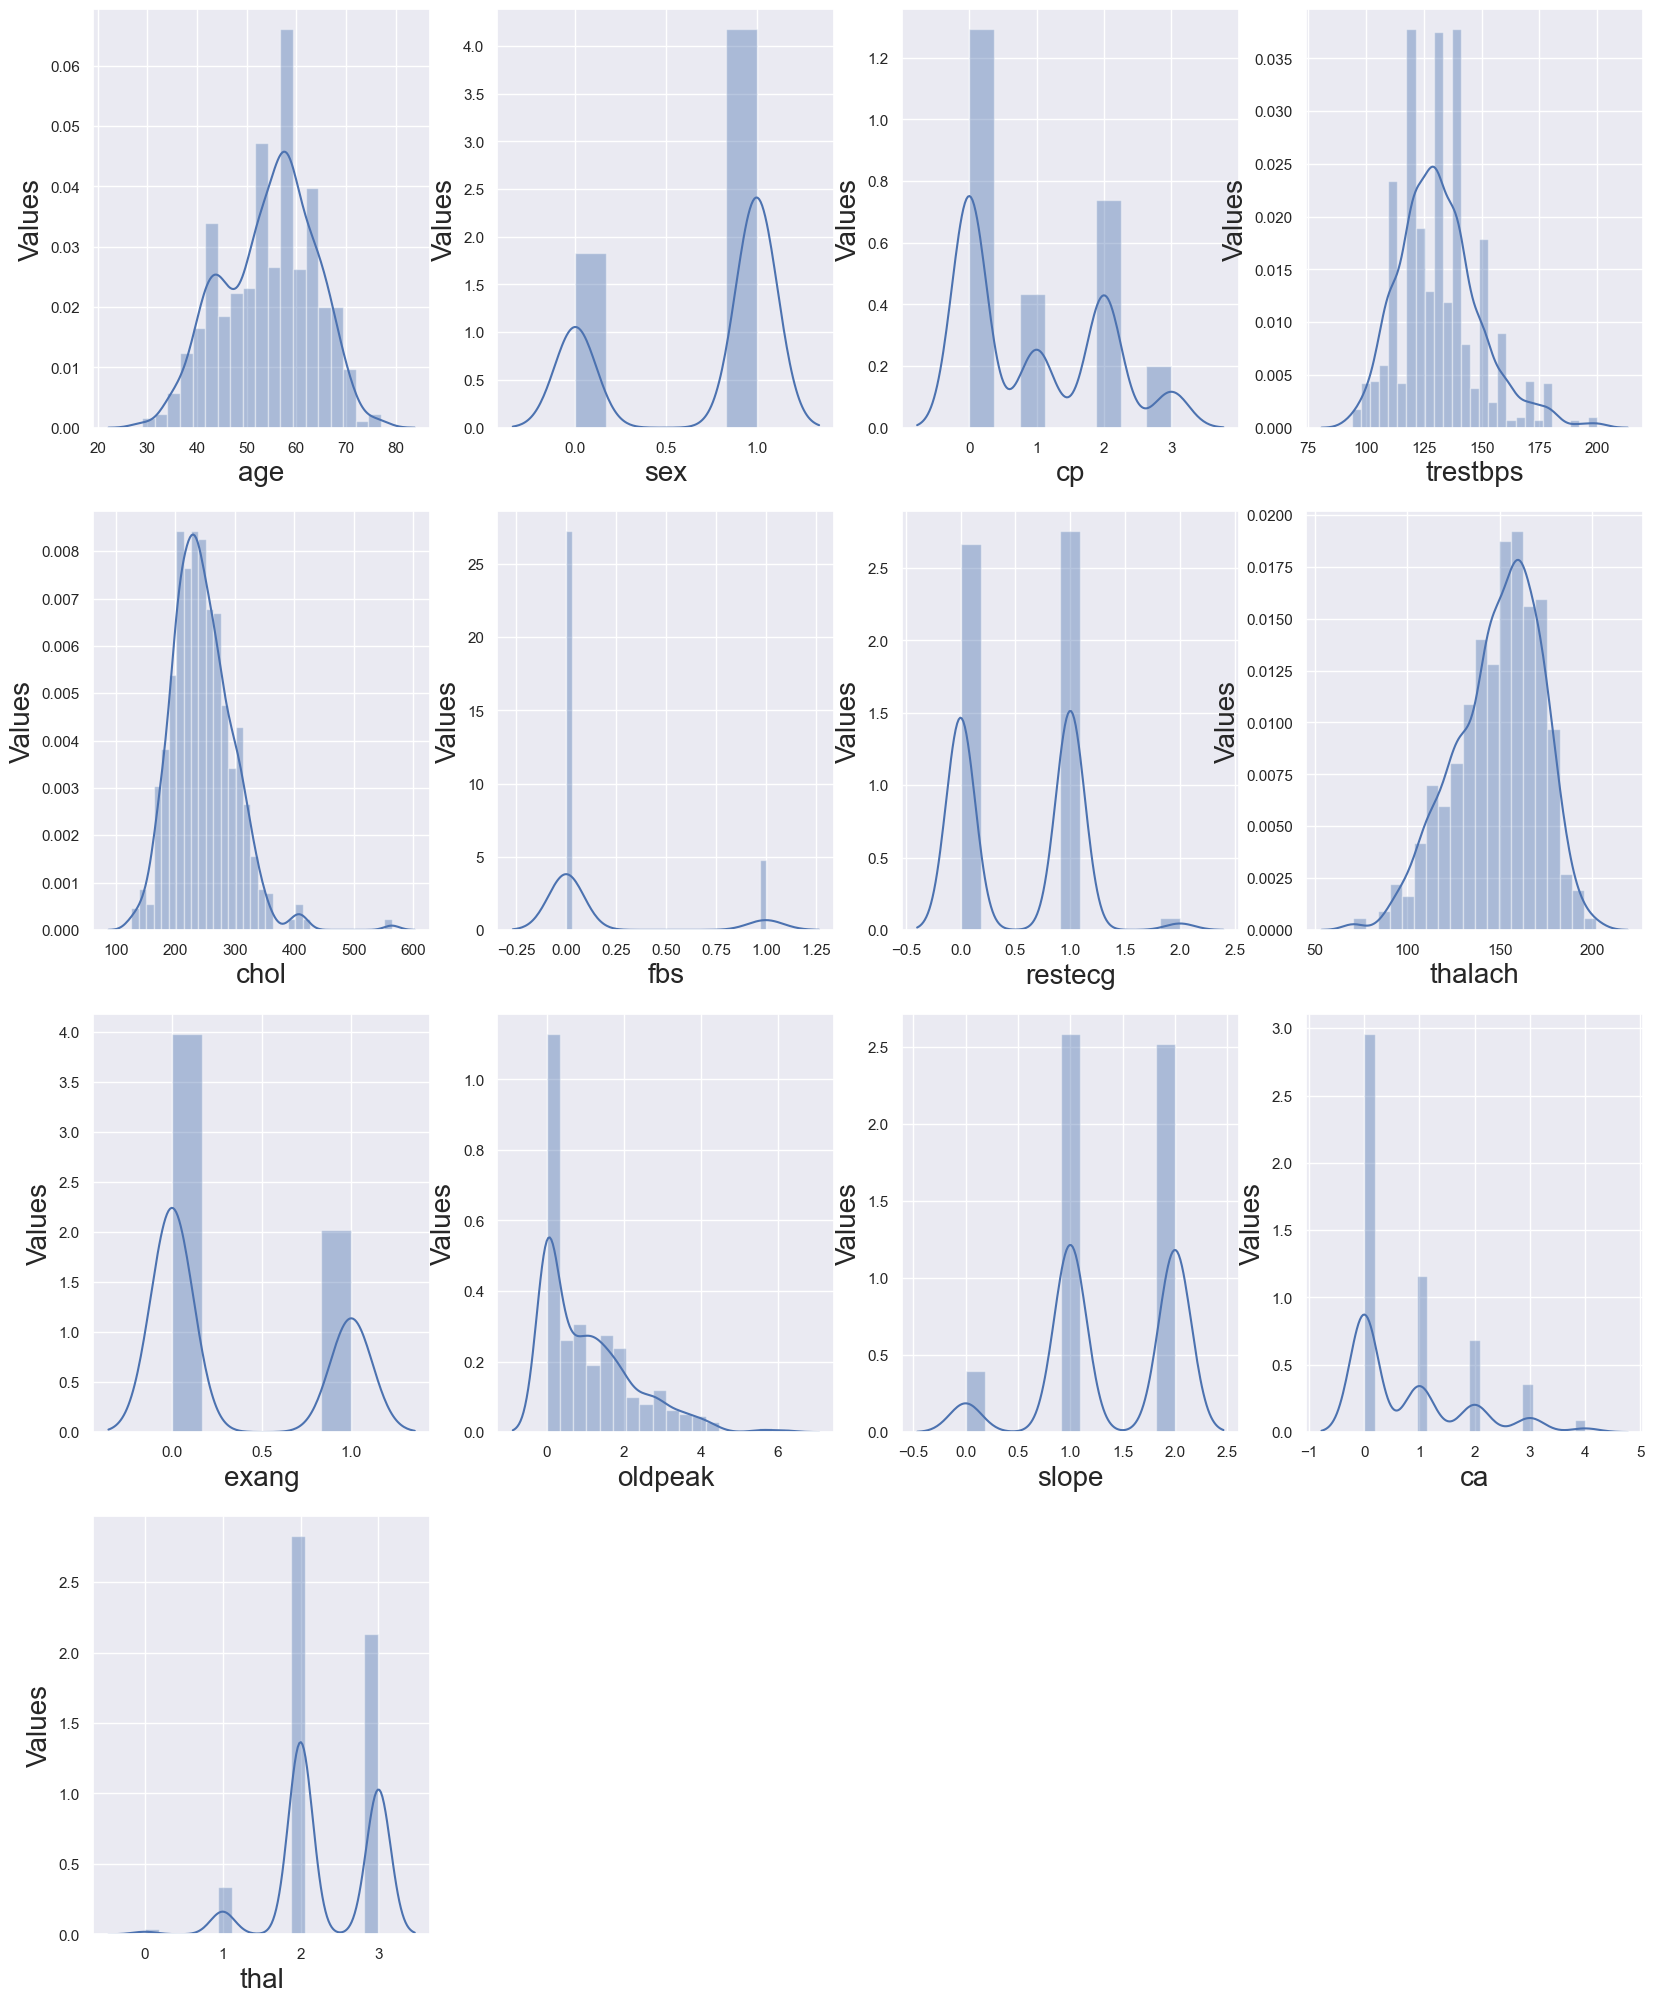

In [8]:
# Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber = 1

for column in heart_df:
    if plotnumber < 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Values', fontsize=20)
        plotnumber += 1

plt.show()


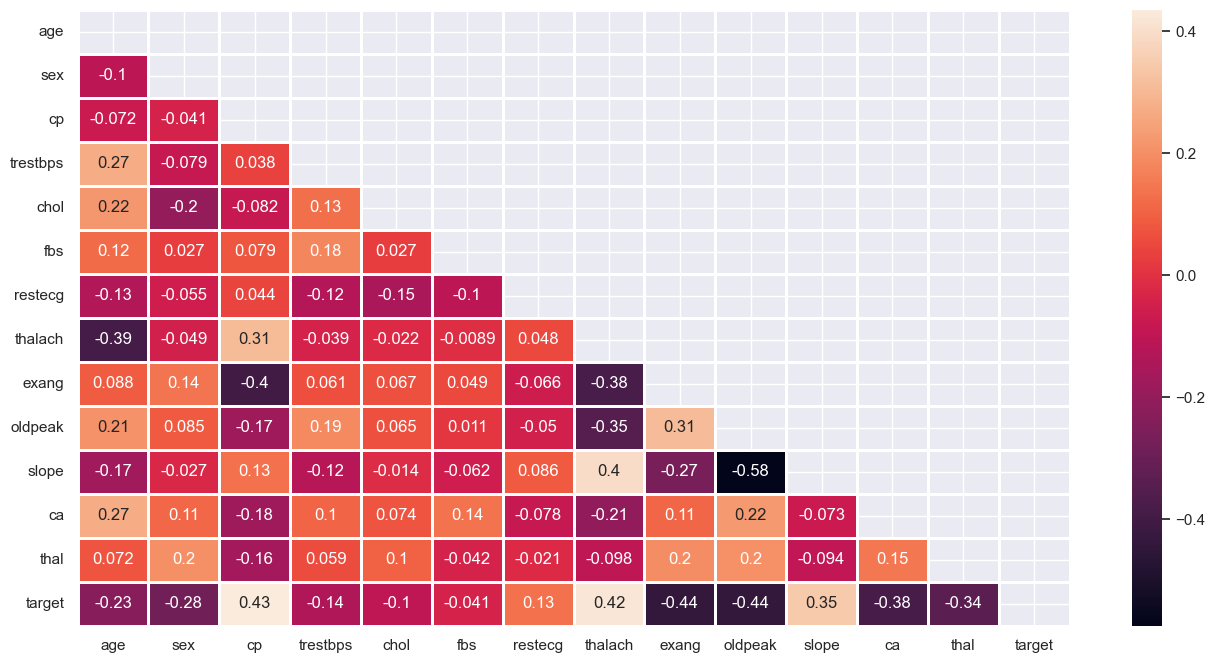

In [9]:
plt.figure(figsize=(16, 8))  # Sets the figure size

corr = heart_df.corr()  # Computes the correlation matrix

mask = np.triu(np.ones_like(corr, dtype=bool))  
# Creates a mask to hide the upper triangle of the matrix (since correlation is symmetric)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2g", linewidths=1)  
# Creates a heatmap:
# - `mask=mask`: Hides the upper triangle.
# - `annot=True`: Displays correlation values.
# - `fmt=".2g"`: Formats the values to 2 decimal places.
# - `linewidths=1`: Adds lines between cells for better visualization.

plt.show()  # Displays the heatmap


In [10]:
heart_df.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

NORMALIZATION

In [12]:
#LOG TRANSFORMATION--->Original chol(200)	Log Transformed chol(5.3)

heart_df['trestbps'] = np.log(heart_df['trestbps'])
heart_df['chol'] = np.log(heart_df['chol'])
heart_df['thalach'] = np.log(heart_df['thalach'])

#VARIANCE CALCULATION
np.var(heart_df[['trestbps', 'chol', 'thalach']])#Computes the variance for the three log-transformed features.





trestbps    0.000705
chol        0.001379
thalach     0.001145
dtype: float64

In [14]:
x = heart_df.drop('target', axis=1)  # Features (independent variables)
y = heart_df['target']  # Target variable (dependent variable)
#x: Contains all columns except target (patient's heart disease status).
#y: Contains only the target column (1 = has disease, 0 = no disease).


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)
#test_size=0.30: 30% of data is used for testing, and 70% for training.
#70% of the data is assigned to:
#x_train (features)
#y_train (labels)
#30% of the data is assigned to:
#x_test (features)
#y_test (labels)


LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression(penalty='l2')  # Using L2 regularization--to avoid overfitting
lr.fit(x_train, y_train)  # Training the model with training data
y_pred = lr.predict(x_test)#Uses the trained model to predict outcomes on the test set
accuracy_score(y_test, y_pred) * 100
print("Accuracy score of the model is:", accuracy_score(y_test, y_pred) * 100)





Accuracy score of the model is: 86.68831168831169


In [17]:
print("Confusion matrix of the model:", confusion_matrix(y_test, y_pred))


Confusion matrix of the model: [[129  25]
 [ 16 138]]


In [18]:
print("Classification Report:", classification_report(y_test, y_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.89      0.84      0.86       154
           1       0.85      0.90      0.87       154

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)#he model considers 8 nearest neighbors when making predictions.
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy score of the model is:", accuracy_score(y_test, y_pred1) * 100, "%")





Accuracy score of the model is: 85.06493506493507 %


In [20]:
print("Confusion matrix of the model:", confusion_matrix(y_test, y_pred1))


Confusion matrix of the model: [[135  19]
 [ 27 127]]


In [21]:
print("Classification Report:", classification_report(y_test, y_pred1))


Classification Report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85       154
           1       0.87      0.82      0.85       154

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



SVC

In [22]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the SVM model
svc = SVC()
svc.fit(x_train, y_train)

# Making predictions
y_pred2 = svc.predict(x_test)

# Calculating accuracy
acc2 = accuracy_score(y_test, y_pred2) * 100
accuracies = {'SVC': acc2}

# Printing the accuracy score
print(f"Accuracy score of the model: {acc2:.2f} %")

# Printing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


Accuracy score of the model: 68.83 %

Confusion Matrix:
[[108  46]
 [ 50 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       154
           1       0.69      0.68      0.68       154

    accuracy                           0.69       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.69      0.69      0.69       308



DECISION TREE

In [23]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Making predictions
y_pred3 = dtc.predict(x_test)

# Calculating accuracy
acc3 = accuracy_score(y_test, y_pred3) * 100
accuracies = {'DecisionTreeClassifier': acc3}

# Printing the accuracy score
print(f"Accuracy score of the model: {acc3:.2f} %")

# Printing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))


Accuracy score of the model: 97.08 %

Confusion Matrix:
[[151   3]
 [  6 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       154
           1       0.98      0.96      0.97       154

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [24]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Defining hyperparameter grid
grid_params = {
    'criterion': ['gini', 'entropy'],        # Splitting criteria
    'max_depth': [3, 5, 7, 10],              # Maximum depth of the tree
    'min_samples_split': range(2, 10, 1),    # Minimum samples required to split a node
    'min_samples_leaf': range(2, 10, 1)      # Minimum samples required at a leaf node
}

# Initializing Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Performing Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)  # Training GridSearchCV on training data

# Displaying the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluating the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculating and printing accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Best Model Accuracy: {accuracy:.2f} %")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best Model Accuracy: 92.86 %

Confusion Matrix:
[[151   3]
 [ 19 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       154
           1       0.98      0.88      0.92       154

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train Random Forest Classifier
rfc = RandomForestClassifier(criterion='gini', max_depth=7, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2)
rfc.fit(x_train, y_train)

# Predictions
y_preds = rfc.predict(x_test)

# Accuracy calculation
acc = accuracy_score(y_test, y_preds)
accuracies = {'RandomForestClassifier': acc * 100}

# Display results
print("Accuracy score of the model is:", accuracy_score(y_test, y_preds) * 100, "%")
print("Confusion matrix of the model:\n", confusion_matrix(y_test, y_preds))
print("Classification Report:\n", classification_report(y_test, y_preds))

Accuracy score of the model is: 96.1038961038961 %
Confusion matrix of the model:
 [[149   5]
 [  7 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       154
           1       0.97      0.95      0.96       154

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



BOOSTING

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=dtc)

parameters = {
    'n_estimators': [50, 70, 90, 120, 180, 200],#The number of weak learners (Decision Trees) to be trained.
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],#Controls the contribution of each weak learner (higher values may cause overfitting).
    'algorithm': ['SAMME', 'SAMME.R']#Uses discrete boosting (multi-class classification).,Uses real-valued boosting (recommended for better accuracy).
}

grid_search = GridSearchCV(ada, parameters, n_jobs=-1, cv=5, verbose=1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

y_pred6 = grid_search.predict(x_test)
acc6 = accuracy_score(y_test, y_pred6)
accuracies = {"GradientBoosting": acc6 * 100}

print("Accuracy score of the model is:", acc6 * 100, "%")
print("Confusion matrix of the model:\n", confusion_matrix(y_test, y_pred6))
print("Classification Report:\n", classification_report(y_test, y_pred6))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy score of the model is: 97.07792207792207 %
Confusion matrix of the model:
 [[151   3]
 [  6 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       154
           1       0.98      0.96      0.97       154

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
xgb = XGBClassifier(booster="gblinear", learning_rate=1, max_depth=6, n_estimators=10)
xgb.fit(x_train, y_train)

# Make predictions
y_pred7 = xgb.predict(x_test)

# Calculate accuracy
acc7 = accuracy_score(y_test, y_pred7)
accuracies = {"XGBoost Classifier": acc7 * 100}

# Print accuracy
print("Accuracy score of the model is:", accuracy_score(y_test, y_pred7) * 100, "%")

# Print confusion matrix and classification report
print("Confusion matrix of the model:\n", confusion_matrix(y_test, y_pred7))
print("Classification Report:\n", classification_report(y_test, y_pred7))


Accuracy score of the model is: 83.76623376623377 %
Confusion matrix of the model:
 [[123  31]
 [ 19 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       154
           1       0.81      0.88      0.84       154

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



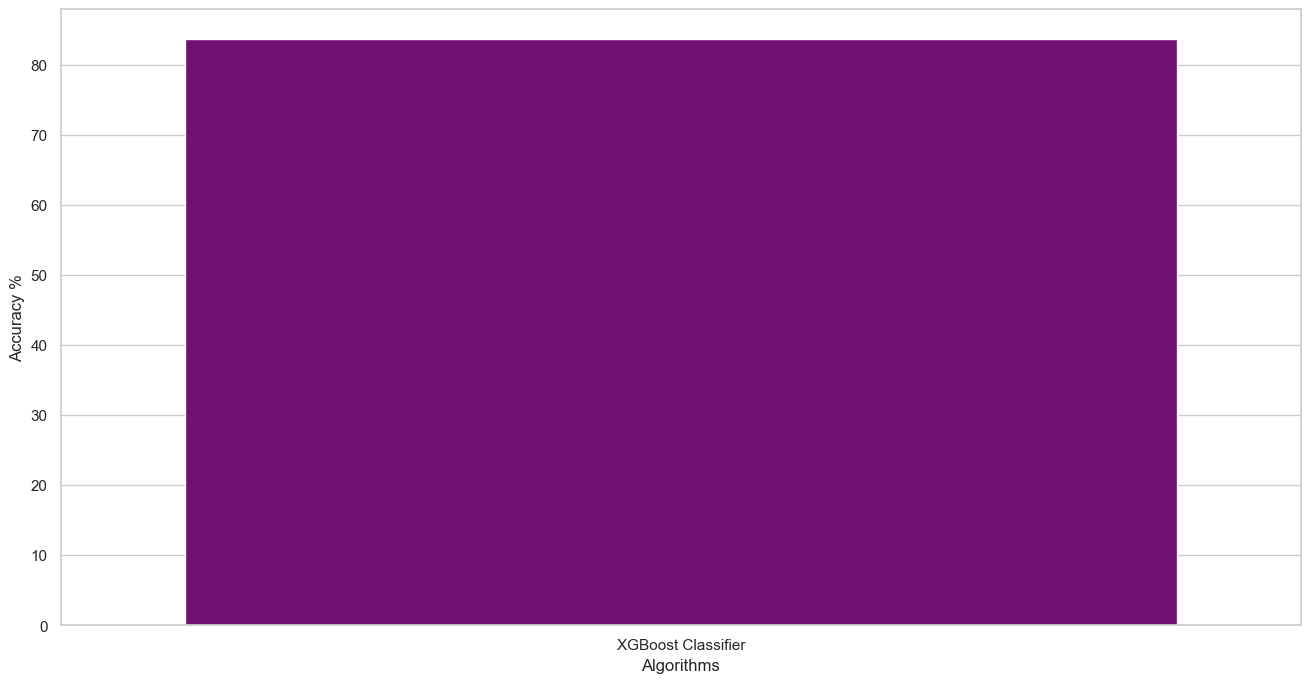

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define colors for the plot
colors = ["purple", "green", "orange", "magenta", "blue", "black"]

# Set style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Define y-axis range
plt.yticks(np.arange(0, 120, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# Create bar plot
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

# Show the plot
plt.show()


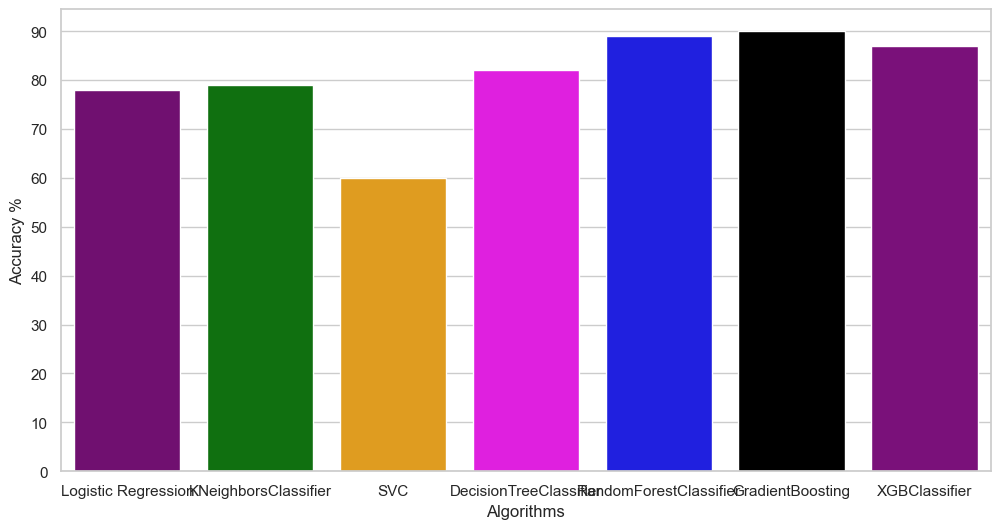

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Accuracy scores for different models
accuracies = {
    "Logistic Regression": 78,
    "KNeighborsClassifier": 79,
    "SVC": 60,
    "DecisionTreeClassifier": 82,
    "RandomForestClassifier": 89,
    "GradientBoosting": 90,
    "XGBClassifier": 87
}

# Define colors for each bar
colors = ["purple", "green", "orange", "magenta", "blue", "black", "darkmagenta"]

# Set seaborn style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(12, 6))

# Define y-axis range
plt.yticks(np.arange(0, 110, 10))

# Labels for axes
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# Create a bar plot with specified colors
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

# Show the plot
plt.show()


In [32]:
import pickle

# Save the best model
with open("heart_disease_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Load the model
with open("heart_disease_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)


NameError: name 'X_test' is not defined

In [34]:
import pickle

# Assume your model is trained (e.g., voting classifier)
model =   # Example trained model

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (697399098.py, line 8)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the Gradient Boosting Model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc.fit(x_train, y_train)

# Making Predictions
y_pred = gbc.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy * 100, "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 94.48051948051948 %

Confusion Matrix:
 [[147   7]
 [ 10 144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       154
           1       0.95      0.94      0.94       154

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



In [40]:
import pickle

# Save the best model
with open("heart_disease_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Load the model
with open("heart_disease_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Predict using the loaded model
y_pred = loaded_model.predict(x_test)
# Display the Prediction Output
print("Predicted Output:", y_pred)


Predicted Output: [1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 0 1 1]


In [41]:
# Interpretation
if y_pred[0] == 1:
    print("The model predicts that the patient has heart disease.")
else:
    print("The model predicts that the patient does NOT have heart disease.")

The model predicts that the patient has heart disease.
